# README
This notebook is made out of 2 projects of mine:
* Image recovery algorithm 
* Bayesian Optimization to find the best set of hyperparameters 

As a disclaimer, only the second project involving Bayesian Optimization is relevant for the course Programming for Data Science. However, because such a project is the natural continuation of the other I need to load the image recovery algorithm code, which needs to load a significant number of libraries listed in the cell below.

Furthermore, in order to run the notebooks one should download the code involving the first project, which can be found in this [`my repository`](https://github.com/DavidFernandezBonet/Bayesian_Optimization_Image_Recovery). Please clone it, take a look at the corresponding README and access this [`notebook`](https://github.com/DavidFernandezBonet/Bayesian_Optimization_Image_Recovery/blob/master/Code/Tutorials/Hyperparameter%20Optimization%20in%20the%20context%20of%20Imaging-By-Sequencing.ipynb). However, it is possible to see the results without compiling them in this notebook.

For the project regarding hyperparameter tuning using Bayesian Optimization, all code is made from scratch with these libraries being the exception.

* warnings
* pandas
* matplotlib
* sklearn.gaussian_process

The most important of which is the last one, which is used to build a surrogate model out of a Gaussian Process (see the manuscript for Assignment 4B, Methods).

Lastly, the image recovery algorithm always prints output that might not be insightful when it is iterated several times (I couldn't find a way to stop this without making other interesting output disappear). My suggestion is to take a look at figures/tables rather than text.

# Image Recovery Algorithm - Initialization

In [1]:
import os
import sys

In [2]:
# Run only once

# Make sure all requirements are met
!{sys.executable} -m pip install llvmlite>=0.35 --ignore-installed
!{sys.executable} -m pip install numba==0.51.2
!{sys.executable} -m pip install gensim==3.7.1  
!{sys.executable} -m pip install umap-learn==0.5.3
!{sys.executable} -m pip install scipy==1.9.0
!{sys.executable} -m pip install networkx==2.8.6
!{sys.executable} -m pip install setuptools~=60.2.0
!{sys.executable} -m pip install pandas~=1.4.3
!{sys.executable} -m pip install matplotlib~=3.5.3
!{sys.executable} -m pip install pycpd~=2.0.0
!{sys.executable} -m pip install scikit-learn~=1.1.2
!{sys.executable} -m pip install scipy~=1.9.0
!{sys.executable} -m pip install numpy~=1.22.4
!{sys.executable} -m pip install csrgraph~=0.1.28
!{sys.executable} -m pip install nodevectors~=0.1.23
!{sys.executable} -m pip install networkx~=2.8.6
!{sys.executable} -m pip install seaborn~=0.11.2


ERROR: numba 0.51.2 has requirement llvmlite<0.35,>=0.34.0.dev0, but you'll have llvmlite 0.39.1 which is incompatible.


  Using cached llvmlite-0.34.0-cp38-cp38-win_amd64.whl (15.9 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1


In [3]:
os.chdir("..") # To read functions
from image_recovery_main import *

os.chdir("..") # To access data folders
parent_dir = os.getcwd()
create_folder_structure(parent_dir)

The new directory C:\Users\David\Desktop\Image_Recovery_Package-master/Parameter_Analysis is created!
The new directory C:\Users\David\Desktop\Image_Recovery_Package-master/Parameter_Analysis/Data is created!
The new directory C:\Users\David\Desktop\Image_Recovery_Package-master/Reconstructed_Animations is created!
The new directory C:\Users\David\Desktop\Image_Recovery_Package-master/Reconstructed_Figures is created!
The new directory C:\Users\David\Desktop\Image_Recovery_Package-master/Appendix_Data is created!


## Parameter declaration

Some relevant parameters:
* embedding_mode
* manifold_learning_mode
* proximity_mode
* density
* mode_3D
* plot_mode

The documentation *documentation link* contains more information about parameters.

All parameters have a *default* value to make it easier for the user. 

PreProcessing done --- 7.386292457580566 seconds  ---
Embedding done --- 0.5794944763183594 seconds  ---
shape embedded vectors: (5000, 32)
Dimensionality reduction done --- 9.982654094696045 seconds  ---
Peak memory --- 52.395310401916504 MB
mean distortion after coherent point drift registration: 0.49112109296731615 
chirality indices: [1, 1, 1]
mean distortion after coherent point drift registration: 0.03646654949361843 
chirality indices: [1, -1, 1]
Accepted mean distortion: 0.03646654949361843


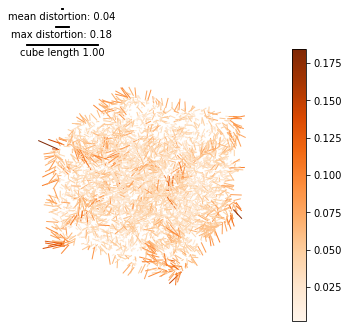

mean_distortion: 0.03646654949361843, var_distortion: 0.0003762619821707521, kur_distortion: 3.2915723474893728
Quality metrics: {'K': 15, 'KNN': 0.7534142857142784, 'CPD': 0.9894055741211114, 'Distortion': 0.03646654949361843, 'Time': 9.983651161193848, 'Memory': 52.395310401916504}


{'K': 15,
 'KNN': 0.7534142857142784,
 'CPD': 0.9894055741211114,
 'Distortion': 0.03646654949361843,
 'Time': 9.983651161193848,
 'Memory': 52.395310401916504}

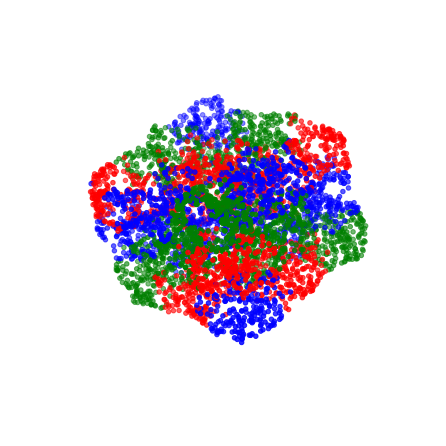

In [282]:

default_parameters = Im_Rec_Arguments()   # Call default parameters
default_parameters.plot_mode = True
default_parameters.mode_3D = True
default_parameters.embedding_mode = "ggvec"
default_parameters.align_to_original = True
default_parameters.density = 5000
params = default_parameters.__dict__
recover_image(params)  # Main function to recover images

# Hyperparameter Optimization from Scratch
## One-dimensional toy model 
As a showcase example we first try our hyperparameter optimization on a toy model.

In particular, a 1d function f(x) which shows several extrema to check if any of the strategies will get stuck in the local maxima. The strategies that will be covered are:
* Grid Search
* Random Search
* Bayesian Optimization

For the Bayesian Optimization we can take a look at the surrogate function before the optimization (only using priors) and after. 

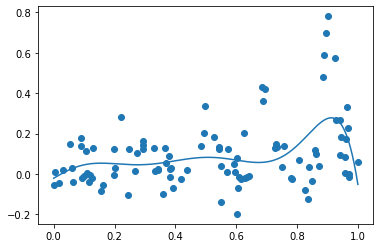

xarray! [0.90019733]
sample set [0.90019733], f()=[0.2750051], actual=[0.74243105]
xarray! [0.91472691]
sample set [0.91472691], f()=[0.30812454], actual=[0.7524882]
xarray! [0.94621906]
sample set [0.94621906], f()=[0.28476429], actual=[-0.00697513]
xarray! [0.90524855]
sample set [0.90524855], f()=[0.32287979], actual=[0.8885255]
xarray! [0.91032492]
sample set [0.91032492], f()=[0.35530758], actual=[0.71358198]
xarray! [0.90944999]
sample set [0.90944999], f()=[0.37473917], actual=[0.8271525]
xarray! [0.11610162]
sample set [0.11610162], f()=[0.05310726], actual=[-0.00791503]
xarray! [0.99587586]
sample set [0.99587586], f()=[-0.14513928], actual=[-0.02145126]
xarray! [0.79624217]
sample set [0.79624217], f()=[0.16956758], actual=[0.15839662]
xarray! [0.40335035]
sample set [0.40335035], f()=[0.07673824], actual=[0.13382013]
xarray! [0.0444265]
sample set [0.0444265], f()=[0.0173189], actual=[-0.02006567]
xarray! [0.66563461]
sample set [0.66563461], f()=[0.0364626], actual=[0.11878

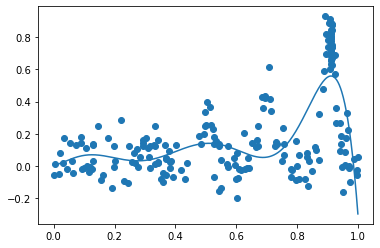

Best Result: sample_set=[0.89164853], objective=0.93040411815308
            X  Objective function
0    0.591664            0.048378
1    0.823841           -0.080255
2    0.497478            0.335554
3    0.750584            0.032819
4    0.418425           -0.025680
..        ...                 ...
195  0.504820            0.395226
196  0.911417            0.777948
197  0.910886            0.685452
198  0.331974            0.125532
199  0.496473            0.250110

[200 rows x 2 columns]
Best Result: sample_set=0.9084574974128514, objective=0.8713193151469724
            X  Objective function
0    0.142724            0.111092
1    0.807011           -0.046178
2    0.227346           -0.152204
3    0.066392            0.035048
4    0.280144            0.125509
..        ...                 ...
195  0.756801            0.103658
196  0.475049            0.311340
197  0.237134           -0.128042
198  0.311496            0.194716
199  0.423773            0.117405

[200 rows x 2 columns

In [269]:
# example of bayesian optimization for a 1d function from scratch
from sklearn.gaussian_process import GaussianProcessRegressor
import warnings
import pandas as pd
import matplotlib.pyplot as plt

# Define a simple objective function
def objective(params):
    noise = np.random.normal(loc=0, scale=0.1)  # I introduce normal noise to simulate "usual" functions
    return (params**2 * np.sin(5*np.pi*params)**6.0) + noise
    return objective_function


# surrogate or approximation for the objective function
def surrogate(model, X):
    # catch any warning generated when making a prediction
    with warnings.catch_warnings():
        # ignore generated warnings
        warnings.simplefilter("ignore")
        return model.predict(X, return_std=True)

# acquisition function - rules to decide which hyperparameter set is best
def acquisition(X, Xsamples, model):
    # update surrogate model
    surrogate_output, _ = surrogate(model, X)
    best = np.max(surrogate_output)  
    # calculate mean and stdev via surrogate function given randomly proposed samples
    mu, std = surrogate(model, Xsamples)
    # calculate the probability of improvement
    probs = norm.cdf((mu - best) / (std+1E-9))  # Add small number to std to avoid singularity
    return probs


# optimize the acquisition function
def opt_acquisition(X, y, model):
    # generate random samples to choose from
    set_samples = np.random.random(100)   # array containing parameter sets in each row
    set_samples = set_samples.reshape(len(set_samples), 1)
    # calculate the acquisition function for each sample
    scores = acquisition(X, set_samples, model)  # scores determine the probability of improvement for each sample
    # locate the index of the largest scores (best probability of improvement)
    ix = np.argmax(scores) # this sample is the one that has the "best" probability of improvement 
    return set_samples[ix, :]

def plot(X, y, model, title):
    # scatter plot of inputs and real objective function
    plt.scatter(X, y)
    # line plot of surrogate function across domain
    Xsamples = np.asarray(arange(0, 1, 0.001))
    Xsamples = Xsamples.reshape(len(Xsamples), 1)
    ysamples, _ = surrogate(model, Xsamples)
    plt.plot(Xsamples, ysamples)
    plt.savefig(title)
    plt.show()



# PART 1 - GATHER PRIORS: INITIALIZE WITH RANODM SEARCH

# X is the input for the obj function, xarray is an array containing the parameters of interest
Xarray = np.random.random(100) 
# y is the result of the objective function for each parameter set
y = np.asarray([objective(x) for x in Xarray])
Xarray = Xarray.reshape(len(Xarray), 1)
# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(Xarray, y)
plot(Xarray, y, model, "surrogate_function_before.pdf")


    
# PART 2 - BAYESIAN OPTIMIZATION
for i in range(100):
    # select the next point to sample
    xarray = opt_acquisition(Xarray, y, model)
    # sample the point
    actual = objective(xarray)
    # summarize the finding
    est, _ = surrogate(model, np.array([xarray]))
    # add the data to the dataset
    Xarray = np.vstack((Xarray, xarray))
    y = np.hstack((y, actual[0]))
    # update the model (update the guassian surrogate function)
    model.fit(Xarray, y)

# plot all samples and the final surrogate function
plot(Xarray, y, model, "surrogate_function_after.pdf")
# best result
ix = np.argmax(y)


print(f"Best Result: sample_set={Xarray[ix,:]}, objective={y[ix]}")
results_bayesian1d = pd.DataFrame({"X": Xarray[:,0], "Objective function": y})
print(results_bayesian1d)
results_bayesian1d.to_csv("df_bayesian_search_1d.csv")



# RANDOM SEARCH
Xarray = np.random.random(200) 
y = np.asarray([objective(x) for x in Xarray])
ix = np.argmax(y)

print(f"Best Result: sample_set={Xarray[ix]}, objective={y[ix]}")
results_random1d = pd.DataFrame({"X": Xarray, "Objective function": y})
print(results_random1d)
results_random1d.to_csv("df_random_search_1d.csv")

# GRID SEARCH
Xarray = np.linspace(0,1,200)
y = np.asarray([objective(x) for x in Xarray])
ix = np.argmax(y)

print(f"Best Result: sample_set={Xarray[ix]}, objective={y[ix]}")
results_grid1d = pd.DataFrame({"X": Xarray, "Objective function": y})
print(results_grid1d)
results_grid1d.to_csv("df_grid_search_1d.csv")


As it can be seen from the output, the surrogate function better models the objective function after running the Bayesian Optimization. The most important feature to model is the global maximum, which is properly captured by the surrogate function.



## Results - 1D Toy model

The non-noisy version of the toy model hhas its global maximum at $x=0.9, f(x)=0.81$. However, because of the artificially introduced noise, the Bayesian search still achieves the best results when compared to grid and random search. It takes $147$ iterations to identify the point with highest objective function value, situated at $x=0.891, f(x)=9.93$. 

It is also interesting to see the evolution of the objective function with the iterations. Grid search's evolution has the shape of the toy model function, as $x$ values are ascending and have the same separation. Random search has unsurprisingly a random evolution, and Bayesian Optimization has a high variance, combining exploratory and exploitative strategies.

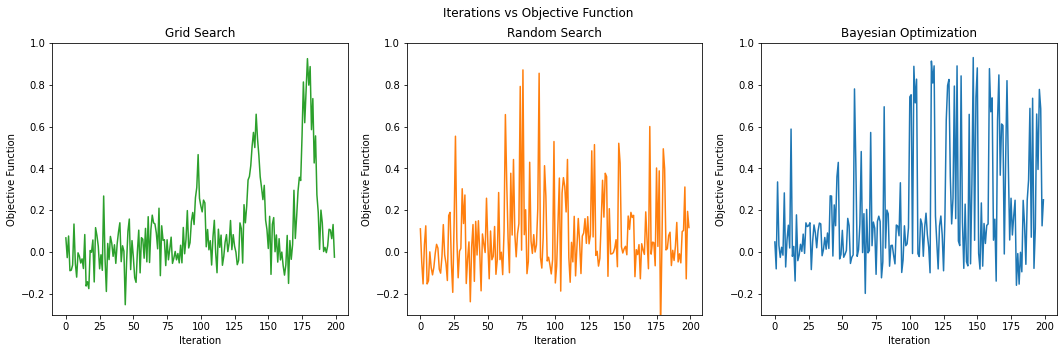

,Statistic,Grid Search,Random Search,Bayesian Optimization
0,Best objective,0.925242,0.871319,0.930404
1,Best X,0.899497,0.908457,0.891649
2,Iterations to best,179.000000,76.000000,147.000000
3,Mean objective,0.107681,0.085341,0.200263
4,Std objective,0.207757,0.197605,0.287992
5,Mean x,0.500000,0.472972,0.577799
6,Std x,0.290850,0.297551,0.303039


In [285]:
# # 1D CASE
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

fig.suptitle("Iterations vs Objective Function")

df_bayesian_search = pd.read_csv('df_bayesian_search_1d.csv')
ax3.plot(df_bayesian_search.index, df_bayesian_search["Objective function"], 'tab:blue')
ax3.set_ylim([-0.3, 1])
ax3.set_title("Bayesian Optimization")
ax3.set(xlabel='Iteration', ylabel='Objective Function')



df_random_search = pd.read_csv('df_random_search_1d.csv')
ax2.plot(df_random_search.index, df_random_search["Objective function"], 'tab:orange')
ax2.set_ylim([-0.3, 1])
ax2.set_title("Random Search")
ax2.set(xlabel='Iteration', ylabel='Objective Function')



df_grid_search = pd.read_csv('df_grid_search_1d.csv')
ax1.plot(df_grid_search.index, df_grid_search["Objective function"], 'tab:green')
ax1.set_ylim([-0.3, 1])
ax1.set_title("Grid Search")
ax1.set(xlabel='Iteration', ylabel='Objective Function')

plt.savefig("Iterations vs Objective Function 1D.pdf")
plt.show()
plt.close()


# STATISTICS 1D
# Iteration to best result
best_bayesian, ix_bayesian = df_bayesian_search["Objective function"].max(), df_bayesian_search["Objective function"].idxmax()
best_random, ix_random_search = df_random_search["Objective function"].max(), df_random_search["Objective function"].idxmax()
best_grid, ix_grid_search = df_grid_search["Objective function"].max(), df_grid_search["Objective function"].idxmax()

best_values = [best_bayesian, best_random, best_grid]
best_indices = [ix_bayesian, ix_random_search, ix_grid_search]

statistics1d_dict = {"Statistic": ["Best objective", "Best X", "Iterations to best", "Mean objective", "Std objective", 
                                 "Mean x", "Std x"],
                  "Grid Search": [best_grid, df_grid_search["X"][ix_grid_search],
                                  ix_grid_search, df_grid_search["Objective function"].mean(), 
                                 df_grid_search["Objective function"].std(),
                                 df_grid_search["X"].mean(),
                                 df_grid_search["X"].std()],

                  "Random Search": [best_random,  df_random_search["X"][ix_random_search], 
                                    ix_random_search, df_random_search["Objective function"].mean(),
                                   df_random_search["Objective function"].std(),
                                   df_random_search["X"].mean(),
                                   df_random_search["X"].std()],

                  "Bayesian Optimization": [best_bayesian,  df_bayesian_search["X"][ix_bayesian], 
                                            ix_bayesian, df_bayesian_search["Objective function"].mean(),
                                           df_bayesian_search["Objective function"].std(),
                                           df_bayesian_search["X"].mean(),
                                           df_bayesian_search["X"].std()],

                  }
statistics1d_df = pd.DataFrame(statistics1d_dict)
display(statistics1d_df)

# Image Recovery - Bayesian Optimization from Scratch

Here we implement the same idea for the one-dimensional toy model but adding necessary modifications featuring:
* Non-linear, unknown objective function
* Multivariate objective function (can accomodate as many parameters as needed)
* Adaptation to parameters that are "labelled" (array to dictionary compatibility)

Again, we are going to implement hyperparameter optimization for grid search, random search and Bayesian Optimization


In [186]:
def get_random_search_set():
    """
    Returns a set of parameters chosen randomly
    """
    default_parameters = Im_Rec_Arguments()   # Call default parameters
    param_set = default_parameters.__dict__
    param_set["density"] = 100
    param_set["embedding_mode"] = "node2vec"
    embedded_dim = np.random.choice(np.arange(4, 256))  #4, 256, 4
    # return_weight = np.random.choice(np.arange(0.5, 5, 0.2))
    walklen =  np.random.choice(np.arange(3,100))
    param_set["embedded_dim"] =embedded_dim
    param_set["walklen"] = walklen
    param_set_array = np.array([embedded_dim, walklen])
    return param_set, param_set_array


def get_multiple_random_search_set_dict(n):
    multiple_param_set = [get_random_search_set() for _ in range(n)]
    param_dict_list, param_array = zip(*multiple_param_set)
    param_array = np.vstack(param_array)  # from tuple of arrays to N x 3 array
    return param_dict_list, param_array


# objective function
def objective(params):
    quality_metrics = recover_image(params)
    # Quality metrics to construct our objective function
    objective_function = 0.5*quality_metrics["KNN"] + 0.5*quality_metrics["CPD"]
    return objective_function

# optimize the acquisition function
def opt_acquisition(X, y, model):
    # random search, generate random samples
    _, set_samples = get_multiple_random_search_set_dict(100)   # array containing parameter sets in each row
    # calculate the acquisition function for each sample
    scores = acquisition(X, set_samples, model)  # scores determine the probability of improvement for each sample
    # locate the index of the largest scores (best probability of improvement)
    ix = np.argmax(scores) # this sample is the one that has the "best" probability of improvement if acquisition is trusted
    return set_samples[ix, :]


def from_array_to_dict(xarray):
    """
    Translates from numerical array to dictionary values
    """
    default_parameters = Im_Rec_Arguments()   # Call default parameters
    param_set = default_parameters.__dict__
    param_set["density"] = 100
    param_set["embedding_mode"] = "node2vec"
    param_set["embedded_dim"] = int(xarray[0])
    param_set["walklen"] = int(xarray[1])
    return param_set


# PART 1 - GATHER PRIORS: INITIALIZE WITH RANODM SEARCH

# X is the input for the obj function, xarray is an array containing the parameters of interest
X, Xarray = get_multiple_random_search_set_dict(20) 
# y is the result of the objective function for each parameter set
y = np.asarray([objective(x) for x in X])

# define the model
model = GaussianProcessRegressor()
# fit the model
model.fit(Xarray, y)
# # plot before hand. Should I only include two parameters to allow plotting?
# plot(X, y, model)
# perform the optimization process


    
# PART 2 - BAYESIAN OPTIMIZATION
for i in range(80):
    # select the next point to sample
    xarray = opt_acquisition(Xarray, y, model)
    print("xarray!", xarray)
    # sample the point
    actual = objective(from_array_to_dict(xarray))
    # summarize the finding
    est, _ = surrogate(model, np.array([xarray]))
    print(f"sample set {xarray}, f()={est}, actual={actual}")

    # add the data to the dataset
    Xarray = np.vstack((Xarray, xarray))
    y = np.hstack((y, np.array([actual])))
    # update the model (update the guassian surrogate function)
    model.fit(Xarray, y)

# best result
ix = np.argmax(y)


print(f"Best Result: sample_set={Xarray[ix,:]}, objective={y[ix]}")
results_bayesian = pd.DataFrame({"Embedded dimension": Xarray[:, 0], "Random Walk length": Xarray[:, 1], "Objective function": y})
print(results_bayesian)
results_bayesian.to_csv("df_bayesian_search.csv")

PreProcessing done --- 2.0724570751190186 seconds  ---
Making walks... Done, T=0.64
Mapping Walk Names... Done, T=0.51
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.51
(100, 100)
Embedding done --- 5.6889965534210205 seconds  ---
shape embedded vectors: (100, 99)
Dimensionality reduction done --- 10.352808713912964 seconds  ---
Peak memory --- 12.8420991897583 MB
Quality metrics: {'K': 15, 'KNN': 0.8564285714285716, 'CPD': 0.9209352397879055, 'Time': 10.354803323745728, 'Memory': 12.8420991897583}
PreProcessing done --- 2.663879632949829 seconds  ---
Making walks... Done, T=0.13
Mapping Walk Names... Done, T=0.20
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.73
(100, 106)
Embedding done --- 2.1232457160949707 seconds  ---
shape embedded vectors: (100, 105)
Dimensionality reduction done --- 10.443986

PreProcessing done --- 2.2380619049072266 seconds  ---
Making walks... Done, T=0.51
Mapping Walk Names... Done, T=0.41
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=2.85
(100, 64)
Embedding done --- 3.801093101501465 seconds  ---
shape embedded vectors: (100, 63)
Dimensionality reduction done --- 8.440212965011597 seconds  ---
Peak memory --- 12.67245864868164 MB
Quality metrics: {'K': 15, 'KNN': 0.8942857142857151, 'CPD': 0.9598718691804922, 'Time': 8.4412100315094, 'Memory': 12.67245864868164}
PreProcessing done --- 2.060490846633911 seconds  ---
Making walks... Done, T=0.27
Mapping Walk Names... Done, T=0.25
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.59
(100, 193)
Embedding done --- 2.166048526763916 seconds  ---
shape embedded vectors: (100, 192)
Dimensionality reduction done --- 6.891273260116

PreProcessing done --- 2.063601016998291 seconds  ---
Making walks... Done, T=0.54
Mapping Walk Names... Done, T=0.43
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.28
(100, 80)
Embedding done --- 5.2806947231292725 seconds  ---
shape embedded vectors: (100, 79)
Dimensionality reduction done --- 9.978504657745361 seconds  ---
Peak memory --- 12.738954544067383 MB
Quality metrics: {'K': 15, 'KNN': 0.863571428571429, 'CPD': 0.9430933973682185, 'Time': 9.979502439498901, 'Memory': 12.738954544067383}
sample set [79 65], f()=[0.55168552], actual=0.9033324129698237
xarray! [154  36]
PreProcessing done --- 2.0774760246276855 seconds  ---
Making walks... Done, T=0.29
Mapping Walk Names... Done, T=0.27
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.87
(100, 155)
Embedding done --- 2.4798684120178223 seconds  

Making walks... Done, T=0.76
Mapping Walk Names... Done, T=0.58
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.67
(100, 43)
Embedding done --- 6.0211920738220215 seconds  ---
shape embedded vectors: (100, 42)
Dimensionality reduction done --- 10.51705002784729 seconds  ---
Peak memory --- 12.629487991333008 MB
Quality metrics: {'K': 15, 'KNN': 0.8621428571428577, 'CPD': 0.6641549590580658, 'Time': 10.518047332763672, 'Memory': 12.629487991333008}
sample set [42 92], f()=[0.78017004], actual=0.7631489081004617
xarray! [68 92]
PreProcessing done --- 2.1521856784820557 seconds  ---
Making walks... Done, T=0.75
Mapping Walk Names... Done, T=0.58
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.76
(100, 69)
Embedding done --- 6.116260528564453 seconds  ---
shape embedded vectors: (100, 68)
Dimensionality red

Done, T=4.58
(100, 79)
Embedding done --- 5.58454442024231 seconds  ---
shape embedded vectors: (100, 78)
Dimensionality reduction done --- 10.108434200286865 seconds  ---
Peak memory --- 12.749950408935547 MB
Quality metrics: {'K': 15, 'KNN': 0.8528571428571436, 'CPD': 0.9371609867823095, 'Time': 10.108434200286865, 'Memory': 12.749950408935547}
sample set [78 66], f()=[0.25080957], actual=0.8950090648197266
xarray! [57 76]
PreProcessing done --- 2.099740982055664 seconds  ---
Making walks... Done, T=0.61
Mapping Walk Names... Done, T=0.49
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.55
(100, 58)
Embedding done --- 5.681904554367065 seconds  ---
shape embedded vectors: (100, 57)
Dimensionality reduction done --- 10.20624566078186 seconds  ---
Peak memory --- 12.645899772644043 MB
Quality metrics: {'K': 15, 'KNN': 0.8664285714285717, 'CPD': 0.9114707140362953, 'Time': 10.207242727279663, 'Me

Dimensionality reduction done --- 6.6855199337005615 seconds  ---
Peak memory --- 13.2423095703125 MB
Quality metrics: {'K': 15, 'KNN': 0.8250000000000002, 'CPD': 0.8706679179254798, 'Time': 6.687514781951904, 'Memory': 13.2423095703125}
sample set [193  30], f()=[0.07532001], actual=0.8478339589627399
xarray! [58 73]
PreProcessing done --- 2.139798164367676 seconds  ---
Making walks... Done, T=0.59
Mapping Walk Names... Done, T=0.48
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.51
(100, 59)
Embedding done --- 5.604486703872681 seconds  ---
shape embedded vectors: (100, 58)
Dimensionality reduction done --- 10.1448335647583 seconds  ---
Peak memory --- 12.634693145751953 MB
Quality metrics: {'K': 15, 'KNN': 0.8714285714285721, 'CPD': 0.9037135515395581, 'Time': 10.14583158493042, 'Memory': 12.634693145751953}
sample set [58 73], f()=[0.50497426], actual=0.8875710614840651
xarray! [195  32]
Pr

PreProcessing done --- 2.224273920059204 seconds  ---
Making walks... Done, T=0.56
Mapping Walk Names... Done, T=0.50
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.49
(100, 79)
Embedding done --- 5.571690320968628 seconds  ---
shape embedded vectors: (100, 78)
Dimensionality reduction done --- 10.1249098777771 seconds  ---
Peak memory --- 12.745342254638672 MB
Quality metrics: {'K': 15, 'KNN': 0.8378571428571431, 'CPD': 0.9014512153871322, 'Time': 10.125907182693481, 'Memory': 12.745342254638672}
sample set [78 69], f()=[0.05441521], actual=0.8696541791221377
xarray! [102  15]
PreProcessing done --- 2.201387882232666 seconds  ---
Making walks... Done, T=0.12
Mapping Walk Names... Done, T=0.15
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.87
(100, 103)
Embedding done --- 1.1711857318878174 seconds  -

Making walks... Done, T=0.87
Mapping Walk Names... Done, T=0.53
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.68
(100, 129)
Embedding done --- 6.127074241638184 seconds  ---
shape embedded vectors: (100, 128)
Dimensionality reduction done --- 10.695993900299072 seconds  ---
Peak memory --- 12.972169876098633 MB
Quality metrics: {'K': 15, 'KNN': 0.8450000000000004, 'CPD': 0.8857146074190484, 'Time': 10.696990489959717, 'Memory': 12.972169876098633}
sample set [128  81], f()=[0.06760736], actual=0.8653573037095244
xarray! [129  85]
PreProcessing done --- 2.24733567237854 seconds  ---
Making walks... Done, T=0.69
Mapping Walk Names... Done, T=0.55
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.67
(100, 130)
Embedding done --- 5.948010206222534 seconds  ---
shape embedded vectors: (100, 129)
Dimensionali

In [187]:
# PART 3 RANDOM SEARCH - 100 ITER
# X is the input for the obj function, xarray is an array containing the parameters of interest
X, Xarray = get_multiple_random_search_set_dict(100) 
# y is the result of the objective function for each parameter set
y = np.asarray([objective(x) for x in X])
results_random_search = pd.DataFrame({"Embedded dimension": Xarray[:, 0], "Random Walk length": Xarray[:, 1], "Objective function": y})
ix = np.argmax(y)
print(f"Best Result: sample_set={Xarray[ix,:]}, objective={y[ix]}")
print(results_random_search)
results_random_search.to_csv("df_random_search.csv")

PreProcessing done --- 2.408989429473877 seconds  ---
Making walks... Done, T=0.69
Mapping Walk Names... Done, T=0.55
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.62
(100, 27)
Embedding done --- 5.879365682601929 seconds  ---
shape embedded vectors: (100, 26)
Dimensionality reduction done --- 10.467294216156006 seconds  ---
Peak memory --- 12.513673782348633 MB
Quality metrics: {'K': 15, 'KNN': 0.8328571428571431, 'CPD': 0.667875365047184, 'Time': 10.468291759490967, 'Memory': 12.513673782348633}
PreProcessing done --- 2.2270755767822266 seconds  ---
Making walks... Done, T=0.33
Mapping Walk Names... Done, T=0.29
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.90
(100, 128)
Embedding done --- 2.5691895484924316 seconds  ---
shape embedded vectors: (100, 127)
Dimensionality reduction done --- 7.143799

PreProcessing done --- 2.271926164627075 seconds  ---
Making walks... Done, T=0.27
Mapping Walk Names... Done, T=0.24
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.51
(100, 183)
Embedding done --- 2.067473888397217 seconds  ---
shape embedded vectors: (100, 182)
Dimensionality reduction done --- 6.6228346824646 seconds  ---
Peak memory --- 13.176748275756836 MB
Quality metrics: {'K': 15, 'KNN': 0.8592857142857152, 'CPD': 0.937236471337288, 'Time': 6.6238319873809814, 'Memory': 13.176748275756836}
PreProcessing done --- 2.254725456237793 seconds  ---
Making walks... Done, T=0.15
Mapping Walk Names... Done, T=0.17
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.97
(100, 228)
Embedding done --- 1.34787917137146 seconds  ---
shape embedded vectors: (100, 227)
Dimensionality reduction done --- 5.9667844772

PreProcessing done --- 2.3285024166107178 seconds  ---
Making walks... Done, T=0.11
Mapping Walk Names... Done, T=0.15
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.80
(100, 205)
Embedding done --- 1.1520366668701172 seconds  ---
shape embedded vectors: (100, 204)
Dimensionality reduction done --- 5.763580799102783 seconds  ---
Peak memory --- 13.2069730758667 MB
Quality metrics: {'K': 15, 'KNN': 0.8257142857142861, 'CPD': 0.8416510779249048, 'Time': 5.764578819274902, 'Memory': 13.2069730758667}
PreProcessing done --- 2.2969510555267334 seconds  ---
Making walks... Done, T=0.60
Mapping Walk Names... Done, T=0.49
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.36
(100, 18)
Embedding done --- 5.4609596729278564 seconds  ---
shape embedded vectors: (100, 17)
Dimensionality reduction done --- 10.00476098

PreProcessing done --- 2.3875715732574463 seconds  ---
Making walks... Done, T=0.66
Mapping Walk Names... Done, T=0.52
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.63
(100, 146)
Embedding done --- 5.854607105255127 seconds  ---
shape embedded vectors: (100, 145)
Dimensionality reduction done --- 10.37946891784668 seconds  ---
Peak memory --- 13.043832778930664 MB
Quality metrics: {'K': 15, 'KNN': 0.8278571428571427, 'CPD': 0.6630547339344078, 'Time': 10.380467653274536, 'Memory': 13.043832778930664}
PreProcessing done --- 2.350717067718506 seconds  ---
Making walks... Done, T=0.16
Mapping Walk Names... Done, T=0.18
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.10
(100, 244)
Embedding done --- 1.5076444149017334 seconds  ---
shape embedded vectors: (100, 243)
Dimensionality reduction done --- 6.1076

PreProcessing done --- 2.368102788925171 seconds  ---
Making walks... Done, T=0.93
Mapping Walk Names... Done, T=0.64
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.92
(100, 33)
Embedding done --- 6.503084659576416 seconds  ---
shape embedded vectors: (100, 32)
Dimensionality reduction done --- 11.071616888046265 seconds  ---
Peak memory --- 13.150830268859863 MB
Quality metrics: {'K': 15, 'KNN': 0.8492857142857148, 'CPD': 0.9282010012122953, 'Time': 11.072614192962646, 'Memory': 13.150830268859863}
PreProcessing done --- 2.649432420730591 seconds  ---
Making walks... Done, T=0.92
Mapping Walk Names... Done, T=0.62
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=6.04
(100, 254)
Embedding done --- 7.653179168701172 seconds  ---
shape embedded vectors: (100, 253)
Dimensionality reduction done --- 12.369009

PreProcessing done --- 2.3517799377441406 seconds  ---
Making walks... Done, T=0.38
Mapping Walk Names... Done, T=0.32
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=2.52
(100, 64)
Embedding done --- 3.2460954189300537 seconds  ---
shape embedded vectors: (100, 63)
Dimensionality reduction done --- 7.797651052474976 seconds  ---
Peak memory --- 12.63157844543457 MB
Quality metrics: {'K': 15, 'KNN': 0.8328571428571432, 'CPD': 0.6531804755751706, 'Time': 7.799645900726318, 'Memory': 12.63157844543457}
PreProcessing done --- 2.379638910293579 seconds  ---
Making walks... Done, T=0.43
Mapping Walk Names... Done, T=0.40
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=2.69
(100, 181)
Embedding done --- 3.5673763751983643 seconds  ---
shape embedded vectors: (100, 180)
Dimensionality reduction done --- 8.11825275

PreProcessing done --- 2.4280483722686768 seconds  ---
Making walks... Done, T=0.61
Mapping Walk Names... Done, T=0.50
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.49
(100, 22)
Embedding done --- 5.619403839111328 seconds  ---
shape embedded vectors: (100, 21)
Dimensionality reduction done --- 10.181260824203491 seconds  ---
Peak memory --- 12.47808837890625 MB
Quality metrics: {'K': 15, 'KNN': 0.8578571428571432, 'CPD': 0.9185563076448331, 'Time': 10.182257890701294, 'Memory': 12.47808837890625}
PreProcessing done --- 2.436527967453003 seconds  ---
Making walks... Done, T=0.14
Mapping Walk Names... Done, T=0.17
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.95
(100, 121)
Embedding done --- 1.3048322200775146 seconds  ---
shape embedded vectors: (100, 120)
Dimensionality reduction done --- 5.8597707

PreProcessing done --- 2.4553675651550293 seconds  ---
Making walks... Done, T=0.06
Mapping Walk Names... Done, T=0.10
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.55
(100, 242)
Embedding done --- 0.7832577228546143 seconds  ---
shape embedded vectors: (100, 241)
Dimensionality reduction done --- 5.347615480422974 seconds  ---
Peak memory --- 13.102500915527344 MB
Quality metrics: {'K': 15, 'KNN': 0.759285714285714, 'CPD': 0.7784142824778665, 'Time': 5.3486127853393555, 'Memory': 13.102500915527344}
PreProcessing done --- 2.518172025680542 seconds  ---
Making walks... Done, T=0.32
Mapping Walk Names... Done, T=0.30
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.93
(100, 192)
Embedding done --- 2.608808994293213 seconds  ---
shape embedded vectors: (100, 191)
Dimensionality reduction done --- 7.19466

In [188]:
# PART 4 GRID SEARCH - 100 ITER
import itertools
embedded_dim_list = np.arange(4,256,24)
walklen_list = np.arange(3,100,12)

param_set={}
default_parameters = Im_Rec_Arguments()   # Call default parameters
param_set = default_parameters.__dict__
param_set["density"] = 100

grid_search_param_list = list(itertools.product(embedded_dim_list, walklen_list)) # 100 parameter sets

Xarray = np.empty((0,2)).astype(int)
y = np.array([])

for param in grid_search_param_list:
    xarray = np.array([param[0], param[1]])
    param_set["embedded_dim"], param_set["walklen"] = param[0], param[1]
    actual = objective(param_set)

    
    Xarray = np.vstack((Xarray, xarray))
    y = np.hstack((y, np.array([actual])))

ix = np.argmax(y)
print(f"Best Result: sample_set={Xarray[ix,:]}, objective={y[ix]}")
results_grid_search = pd.DataFrame({"Embedded dimension": Xarray[:, 0], "Random Walk length": Xarray[:, 1], "Objective function": y})
print(results_grid_search)
results_grid_search.to_csv("df_grid_search.csv")

PreProcessing done --- 2.517306089401245 seconds  ---
Making walks... Done, T=0.02
Mapping Walk Names... Done, T=0.06
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.39
(100, 5)
Embedding done --- 0.4794280529022217 seconds  ---
shape embedded vectors: (100, 4)
Dimensionality reduction done --- 5.072874069213867 seconds  ---
Peak memory --- 12.012113571166992 MB
Quality metrics: {'K': 15, 'KNN': 0.1478571428571427, 'CPD': 0.051117598888568, 'Time': 5.073871850967407, 'Memory': 12.012113571166992}
PreProcessing done --- 2.724919319152832 seconds  ---
Making walks... Done, T=0.12
Mapping Walk Names... Done, T=0.16
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.90
(100, 5)
Embedding done --- 1.1896214485168457 seconds  ---
shape embedded vectors: (100, 4)
Dimensionality reduction done --- 5.72117900848388

PreProcessing done --- 2.4644086360931396 seconds  ---
Making walks... Done, T=0.51
Mapping Walk Names... Done, T=0.43
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=2.73
(100, 29)
Embedding done --- 3.687480926513672 seconds  ---
shape embedded vectors: (100, 28)
Dimensionality reduction done --- 8.222800493240356 seconds  ---
Peak memory --- 12.50784683227539 MB
Quality metrics: {'K': 15, 'KNN': 0.8550000000000004, 'CPD': 0.897632674630387, 'Time': 8.223798990249634, 'Memory': 12.50784683227539}
PreProcessing done --- 2.4978301525115967 seconds  ---
Making walks... Done, T=0.61
Mapping Walk Names... Done, T=0.49
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.57
(100, 29)
Embedding done --- 5.683433771133423 seconds  ---
shape embedded vectors: (100, 28)
Dimensionality reduction done --- 10.17117953300

PreProcessing done --- 2.5127651691436768 seconds  ---
Making walks... Done, T=0.12
Mapping Walk Names... Done, T=0.15
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.86
(100, 77)
Embedding done --- 1.156926155090332 seconds  ---
shape embedded vectors: (100, 76)
Dimensionality reduction done --- 5.700909852981567 seconds  ---
Peak memory --- 12.68719482421875 MB
Quality metrics: {'K': 15, 'KNN': 0.8471428571428576, 'CPD': 0.8796727818539546, 'Time': 5.70290470123291, 'Memory': 12.68719482421875}
PreProcessing done --- 2.516256332397461 seconds  ---
Making walks... Done, T=0.22
Mapping Walk Names... Done, T=0.22
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.45
(100, 77)
Embedding done --- 1.919158935546875 seconds  ---
shape embedded vectors: (100, 76)
Dimensionality reduction done --- 6.4609553813934

PreProcessing done --- 2.535604476928711 seconds  ---
Making walks... Done, T=0.61
Mapping Walk Names... Done, T=0.49
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.42
(100, 101)
Embedding done --- 5.558788299560547 seconds  ---
shape embedded vectors: (100, 100)
Dimensionality reduction done --- 10.206806182861328 seconds  ---
Peak memory --- 12.91049861907959 MB
Quality metrics: {'K': 15, 'KNN': 0.8571428571428573, 'CPD': 0.9252564691360055, 'Time': 10.20780348777771, 'Memory': 12.91049861907959}
PreProcessing done --- 2.510805606842041 seconds  ---
Making walks... Done, T=0.71
Mapping Walk Names... Done, T=0.56
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.59
(100, 101)
Embedding done --- 5.887602806091309 seconds  ---
shape embedded vectors: (100, 100)
Dimensionality reduction done --- 10.3903033

PreProcessing done --- 2.5731754302978516 seconds  ---
Making walks... Done, T=0.22
Mapping Walk Names... Done, T=0.22
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.50
(100, 149)
Embedding done --- 1.9785473346710205 seconds  ---
shape embedded vectors: (100, 148)
Dimensionality reduction done --- 6.524407625198364 seconds  ---
Peak memory --- 13.022256851196289 MB
Quality metrics: {'K': 15, 'KNN': 0.8314285714285716, 'CPD': 0.7119847210665955, 'Time': 6.525405645370483, 'Memory': 13.022256851196289}
PreProcessing done --- 2.570945978164673 seconds  ---
Making walks... Done, T=0.32
Mapping Walk Names... Done, T=0.29
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.90
(100, 149)
Embedding done --- 2.5500710010528564 seconds  ---
shape embedded vectors: (100, 148)
Dimensionality reduction done --- 7.1477

PreProcessing done --- 2.5774223804473877 seconds  ---
Making walks... Done, T=0.72
Mapping Walk Names... Done, T=0.56
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.78
(100, 173)
Embedding done --- 6.119438648223877 seconds  ---
shape embedded vectors: (100, 172)
Dimensionality reduction done --- 10.673871278762817 seconds  ---
Peak memory --- 13.173569679260254 MB
Quality metrics: {'K': 15, 'KNN': 0.866428571428572, 'CPD': 0.9187491795713274, 'Time': 10.674869060516357, 'Memory': 13.173569679260254}
PreProcessing done --- 2.626976251602173 seconds  ---
Making walks... Done, T=0.81
Mapping Walk Names... Done, T=0.62
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.87
(100, 173)
Embedding done --- 6.349332571029663 seconds  ---
shape embedded vectors: (100, 172)
Dimensionality reduction done --- 10.8474

PreProcessing done --- 2.6489174365997314 seconds  ---
Making walks... Done, T=0.42
Mapping Walk Names... Done, T=0.30
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=1.91
(100, 221)
Embedding done --- 2.697265386581421 seconds  ---
shape embedded vectors: (100, 220)
Dimensionality reduction done --- 7.2865588665008545 seconds  ---
Peak memory --- 13.350298881530762 MB
Quality metrics: {'K': 15, 'KNN': 0.873571428571429, 'CPD': 0.9368460902545018, 'Time': 7.287556171417236, 'Memory': 13.350298881530762}
PreProcessing done --- 2.629124402999878 seconds  ---
Making walks... Done, T=0.41
Mapping Walk Names... Done, T=0.36
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=2.69
(100, 221)
Embedding done --- 3.5206944942474365 seconds  ---
shape embedded vectors: (100, 220)
Dimensionality reduction done --- 8.15749

PreProcessing done --- 2.6723556518554688 seconds  ---
Making walks... Done, T=0.79
Mapping Walk Names... Done, T=0.62
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4.91
(100, 245)
Embedding done --- 6.392819166183472 seconds  ---
shape embedded vectors: (100, 244)
Dimensionality reduction done --- 10.97927451133728 seconds  ---
Peak memory --- 13.537215232849121 MB
Quality metrics: {'K': 15, 'KNN': 0.8728571428571437, 'CPD': 0.9293555756693586, 'Time': 10.980271339416504, 'Memory': 13.537215232849121}
Best Result: sample_set=[52 51], objective=0.9185964548891488
    Embedded dimension  Random Walk length  Objective function
0                    4                   3            0.099487
1                    4                  15            0.892473
2                    4                  27            0.824152
3                    4                  39            0.816996
4                    4

# Results

* A plot of the objective function against the number of iterations for every strategy
    * Grid Search
    * Random Search
    * Bayesian Optimization
* The relation between hyperparameters and objective function (it can be seen that they are poorly correlated)
* A table (dataframe) summarizing interesting statistics


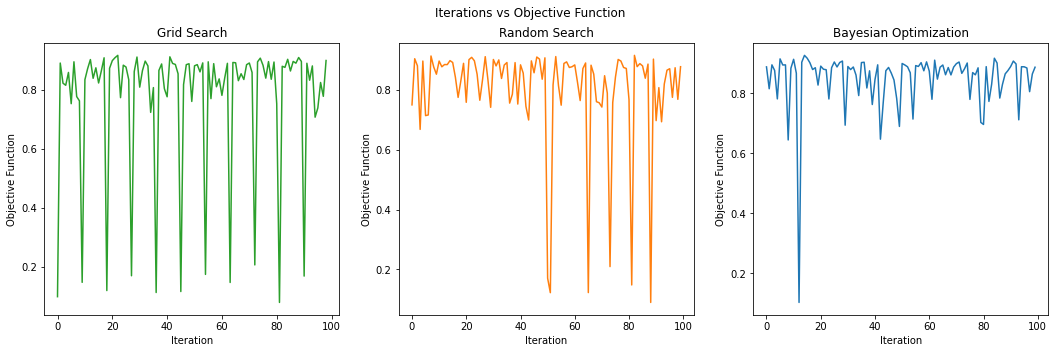

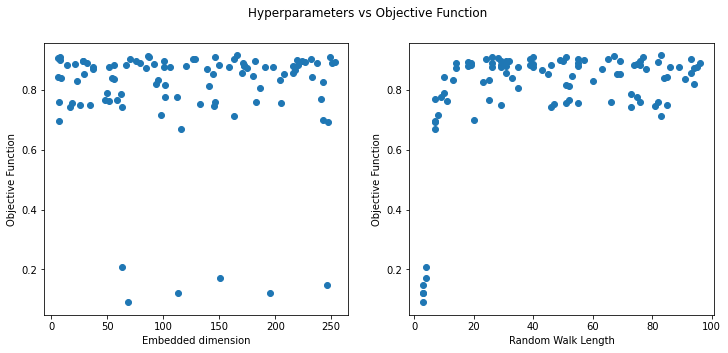

0.7765769294289008


,Statistic,Grid Search,Random Search,Bayesian Optimization
0,Best objective,0.918596,0.915878,0.927079
1,Best parameters,"(52, 51)","(166, 83)","(63, 61)"
2,Iterations to best,22,82,14
3,Mean objective,0.776577,0.799647,0.849017
4,Std objective,0.231094,0.177969,0.09838
5,Mean embedding dim,124.0,121.91,99.24
6,Std embedding dim,76.280899,76.920278,40.026032
7,Mean RW length,51.0,46.65,61.72
8,Std RW length,31.141546,28.329723,27.757274


In [284]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

fig.suptitle("Iterations vs Objective Function")

df_bayesian_search = pd.read_csv('df_bayesian_search.csv')
ax3.plot(df_bayesian_search.index, df_bayesian_search["Objective function"], 'tab:blue')
ax3.set_title("Bayesian Optimization")
ax3.set(xlabel='Iteration', ylabel='Objective Function')



df_random_search = pd.read_csv('df_random_search.csv')
ax2.plot(df_random_search.index, df_random_search["Objective function"], 'tab:orange')
ax2.set_title("Random Search")
ax2.set(xlabel='Iteration', ylabel='Objective Function')



df_grid_search = pd.read_csv('df_grid_search.csv')
ax1.plot(df_grid_search.index, df_grid_search["Objective function"], 'tab:green')
ax1.set_title("Grid Search")
ax1.set(xlabel='Iteration', ylabel='Objective Function')
plt.savefig("Iterations vs Objective Function im rec.pdf")
plt.show()
plt.close()


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("Hyperparameters vs Objective Function")
ax1.scatter(df_random_search["Embedded dimension"], df_random_search["Objective function"] )
ax1.set(xlabel='Embedded dimension', ylabel='Objective Function')


ax2.scatter(df_random_search["Random Walk length"], df_random_search["Objective function"] )
ax2.set(xlabel='Random Walk Length', ylabel='Objective Function')
plt.savefig("Hyperparameters vs Objective Function im rec.pdf")
plt.show()
plt.close()


# Iteration to best result
best_bayesian, ix_bayesian = df_bayesian_search["Objective function"].max(), df_bayesian_search["Objective function"].idxmax()
best_random, ix_random_search = df_random_search["Objective function"].max(), df_random_search["Objective function"].idxmax()
best_grid, ix_grid_search = df_grid_search["Objective function"].max(), df_grid_search["Objective function"].idxmax()

best_values = [best_bayesian, best_random, best_grid]
best_indices = [ix_bayesian, ix_random_search, ix_grid_search]

print(df_grid_search["Objective function"].mean())
statistics_dict = {"Statistic": ["Best objective", "Best parameters", "Iterations to best", "Mean objective", "Std objective", 
                                 "Mean embedding dim", "Std embedding dim", "Mean RW length", "Std RW length"],
                  "Grid Search": [best_grid, (df_grid_search["Embedded dimension"][ix_grid_search], 
                                              df_grid_search["Random Walk length"][ix_grid_search]),
                                 ix_grid_search, df_grid_search["Objective function"].mean(), 
                                 df_grid_search["Objective function"].std(),
                                 df_grid_search["Embedded dimension"].mean(),
                                 df_grid_search["Embedded dimension"].std(),
                                 df_grid_search["Random Walk length"].mean(),
                                 df_grid_search["Random Walk length"].std()],
                  "Random Search": [best_random, (df_random_search["Embedded dimension"][ix_random_search], 
                                              df_random_search["Random Walk length"][ix_random_search]),
                                    ix_random_search, df_random_search["Objective function"].mean(),
                                   df_random_search["Objective function"].std(),
                                   df_random_search["Embedded dimension"].mean(),
                                   df_random_search["Embedded dimension"].std(),
                                   df_random_search["Random Walk length"].mean(),
                                   df_random_search["Random Walk length"].std()],
                  "Bayesian Optimization": [best_bayesian, (df_bayesian_search["Embedded dimension"][ix_bayesian], 
                                              df_bayesian_search["Random Walk length"][ix_bayesian]), 
                                            ix_bayesian, df_bayesian_search["Objective function"].mean(),
                                           df_bayesian_search["Objective function"].std(),
                                           df_bayesian_search["Embedded dimension"].mean(),
                                           df_bayesian_search["Embedded dimension"].std(),
                                           df_bayesian_search["Random Walk length"].mean(),
                                           df_bayesian_search["Random Walk length"].std()]
                  }
statistics_df = pd.DataFrame(statistics_dict)
display(statistics_df)